In [168]:
# Загрузка необходимых библиотек
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules
from efficient_apriori import apriori as efficient_apriori
from apyori import apriori as apyori_apriori
import time

In [169]:
# Загрузка данных
file_path = 'data/Market_Basket_Optimisation.csv'
data = pd.read_csv(file_path, header=None)

# Подготовка данных в формате списка списков
transactions = []
for i in range(len(data)):
    transactions.append([str(data.values[i, j]) for j in range(data.shape[1]) if str(data.values[i, j]) != 'nan'])
print("Shillo S.O. IKBO-25-21")

Shillo S.O. IKBO-25-21


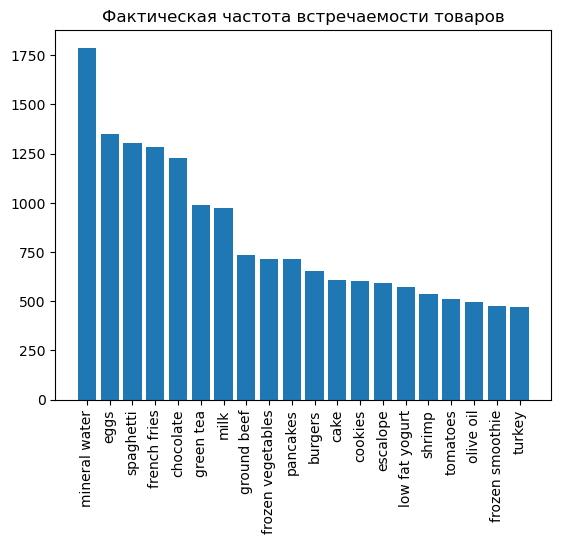

Shillo S.O. IKBO-25-21


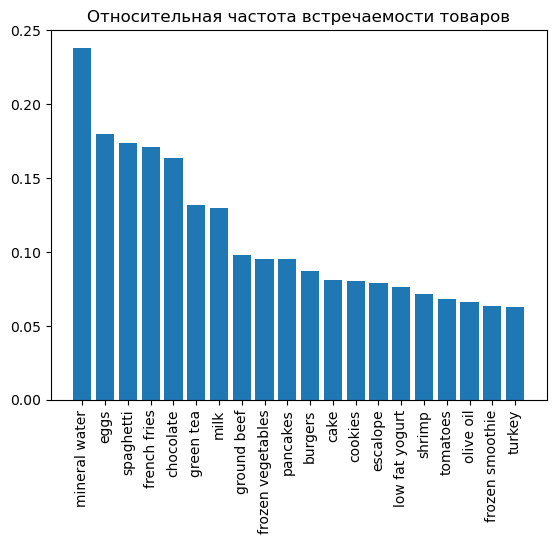

Shillo S.O. IKBO-25-21


In [170]:
# Гистограммы для визуализации частотности товаров
from collections import Counter

item_counts = Counter([item for sublist in transactions for item in sublist])
top_items = item_counts.most_common(20)

# Построение гистограмм
plt.bar([item[0] for item in top_items], [item[1] for item in top_items])
plt.xticks(rotation=90)
plt.title("Фактическая частота встречаемости товаров")
plt.show()
print("Shillo S.O. IKBO-25-21")

relative_freq = [item[1] / len(transactions) for item in top_items]
plt.bar([item[0] for item in top_items], relative_freq)
plt.xticks(rotation=90)
plt.title("Относительная частота встречаемости товаров")
plt.show()
print("Shillo S.O. IKBO-25-21")

In [171]:
# Преобразование данных в формат для mlxtend
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_array = te.fit(transactions).transform(transactions)
df_mlxtend = pd.DataFrame(te_array, columns=te.columns_)

# Применение Apriori (mlxtend)
start_time = time.time()
frequent_itemsets_mlxtend = apriori(df_mlxtend, min_support=0.015, use_colnames=True)
rules_mlxtend = association_rules(frequent_itemsets_mlxtend, metric="confidence", min_threshold=0.38, num_itemsets=2)
mlxtend_time = time.time() - start_time
print(f"Время выполнения (mlxtend): {mlxtend_time:.2f} сек")

# Применение Apriori (apyori)
start_time = time.time()
apyori_results = list(apyori_apriori(transactions, min_support=0.015, min_confidence=0.38))
apyori_time = time.time() - start_time
print(f"Время выполнения (apyori): {apyori_time:.2f} сек")

# Применение Apriori (efficient_apriori)
start_time = time.time()
itemsets, rules = efficient_apriori(transactions, min_support=0.015, min_confidence=0.38)
efficient_apriori_time = time.time() - start_time
print(f"Время выполнения (efficient_apriori): {efficient_apriori_time:.2f} сек")
print("Shillo S.O. IKBO-25-21")

Время выполнения (mlxtend): 0.08 сек
Время выполнения (apyori): 0.03 сек
Время выполнения (efficient_apriori): 0.03 сек
Shillo S.O. IKBO-25-21


In [172]:
# Применение FP-Growth
from fpgrowth_py import fpgrowth

start_time = time.time()
fpgrowth_itemsets, fpgrowth_rules = fpgrowth(transactions, minSupRatio=0.015, minConf=0.38)
fp_growth_time = time.time() - start_time

for i in fpgrowth_rules:
    print(i)

print(f"Время выполнения (FP-Growth): {fp_growth_time:.2f} сек")
print("Shillo S.O. IKBO-25-21")


[{'salmon'}, {'mineral water'}, 0.4012539184952978]
[{'soup'}, {'mineral water'}, 0.45646437994722955]
[{'cooking oil'}, {'mineral water'}, 0.39425587467362927]
[{'olive oil'}, {'mineral water'}, 0.4190283400809717]
[{'ground beef'}, {'spaghetti'}, 0.3989145183175034]
[{'spaghetti', 'ground beef'}, {'mineral water'}, 0.43537414965986393]
[{'mineral water', 'ground beef'}, {'spaghetti'}, 0.4169381107491857]
[{'ground beef'}, {'mineral water'}, 0.41655359565807326]
[{'spaghetti', 'milk'}, {'mineral water'}, 0.44360902255639095]
[{'spaghetti', 'chocolate'}, {'mineral water'}, 0.40476190476190477]
Время выполнения (FP-Growth): 0.94 сек
Shillo S.O. IKBO-25-21


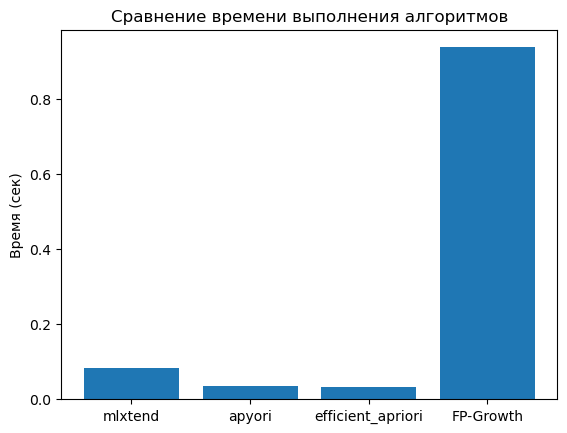

Shillo S.O. IKBO-25-21


In [173]:
# Сравнение времени выполнения
plt.bar(['mlxtend', 'apyori', 'efficient_apriori', 'FP-Growth'],
        [mlxtend_time, apyori_time, efficient_apriori_time, fp_growth_time])
plt.title("Сравнение времени выполнения алгоритмов")
plt.ylabel("Время (сек)")
plt.show()
print("Shillo S.O. IKBO-25-21")


In [174]:
# Загрузка данных
file_path = 'data/data.csv'
data = pd.read_csv(file_path, header=None)

# Подготовка данных в формате списка списков
transactions = []
for i in range(len(data)):
    transactions.append([str(data.values[i, j]) for j in range(data.shape[1]) if str(data.values[i, j]) != 'nan'])
print("Shillo S.O. IKBO-25-21")


Shillo S.O. IKBO-25-21


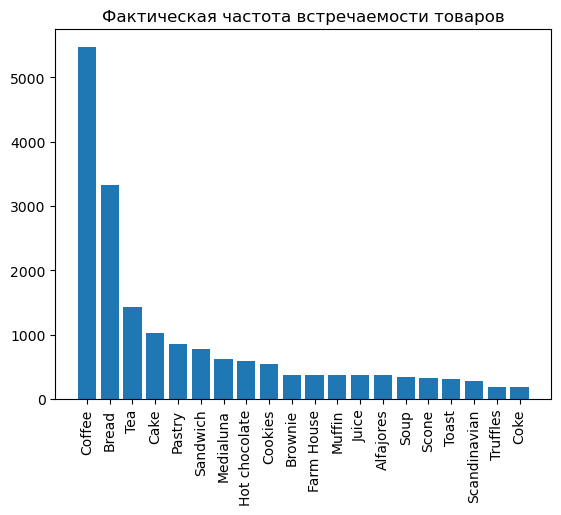

Shillo S.O. IKBO-25-21


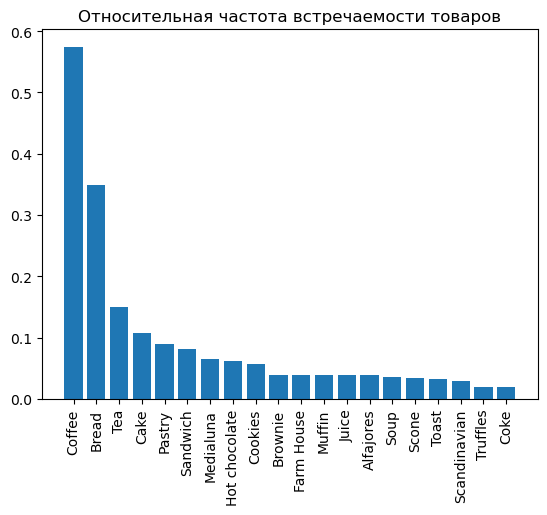

Shillo S.O. IKBO-25-21


In [175]:
# Гистограммы для визуализации частотности товаров
item_counts = Counter([item for sublist in transactions for item in sublist])
top_items = item_counts.most_common(20)

# Построение гистограмм
plt.bar([item[0] for item in top_items], [item[1] for item in top_items])
plt.xticks(rotation=90)
plt.title("Фактическая частота встречаемости товаров")
plt.show()
print("Shillo S.O. IKBO-25-21")

relative_freq = [item[1] / len(transactions) for item in top_items]
plt.bar([item[0] for item in top_items], relative_freq)
plt.xticks(rotation=90)
plt.title("Относительная частота встречаемости товаров")
plt.show()
print("Shillo S.O. IKBO-25-21")


In [176]:
# Преобразование данных в формат для mlxtend
te_array = te.fit(transactions).transform(transactions)
df_mlxtend = pd.DataFrame(te_array, columns=te.columns_)

# Применение Apriori (mlxtend)
start_time = time.time()
frequent_itemsets_mlxtend = apriori(df_mlxtend, min_support=0.024, use_colnames=True)
rules_mlxtend = association_rules(frequent_itemsets_mlxtend, metric="confidence", min_threshold=0.4, num_itemsets=2)
mlxtend_time = time.time() - start_time
print(f"Время выполнения (mlxtend): {mlxtend_time:.2f} сек")

# Применение Apriori (apyori)
start_time = time.time()
apyori_results = list(apyori_apriori(transactions, min_support=0.024, min_confidence=0.4))
apyori_time = time.time() - start_time
print(f"Время выполнения (apyori): {apyori_time:.2f} сек")

# Применение Apriori (efficient_apriori)
start_time = time.time()
itemsets, rules = efficient_apriori(transactions, min_support=0.024, min_confidence=0.4)
efficient_apriori_time = time.time() - start_time
print(f"Время выполнения (efficient_apriori): {efficient_apriori_time:.2f} сек")
print("Shillo S.O. IKBO-25-21")


Время выполнения (mlxtend): 0.01 сек
Время выполнения (apyori): 0.01 сек
Время выполнения (efficient_apriori): 0.01 сек
Shillo S.O. IKBO-25-21


In [177]:
# Применение FP-Growth
start_time = time.time()
fpgrowth_itemsets, fpgrowth_rules = fpgrowth(transactions, minSupRatio=0.024, minConf=0.4)
fp_growth_time = time.time() - start_time
for i in fpgrowth_rules:
    print(i)
print(f"Время выполнения (FP-Growth): {fp_growth_time:.2f} сек")
print("Shillo S.O. IKBO-25-21")


[{'Toast'}, {'Coffee'}, 0.7044025157232704]
[{'Juice'}, {'Coffee'}, 0.5342465753424658]
[{'Alfajores'}, {'Coffee'}, 0.5406976744186046]
[{'Brownie'}, {'Coffee'}, 0.49076517150395776]
[{'Cookies'}, {'Coffee'}, 0.5184466019417475]
[{'Hot chocolate'}, {'Coffee'}, 0.5072463768115942]
[{'Medialuna'}, {'Coffee'}, 0.5692307692307692]
[{'Sandwich'}, {'Coffee'}, 0.5323529411764706]
[{'Pastry'}, {'Coffee'}, 0.5521472392638037]
[{'Cake'}, {'Coffee'}, 0.5269582909460834]
Время выполнения (FP-Growth): 0.19 сек
Shillo S.O. IKBO-25-21


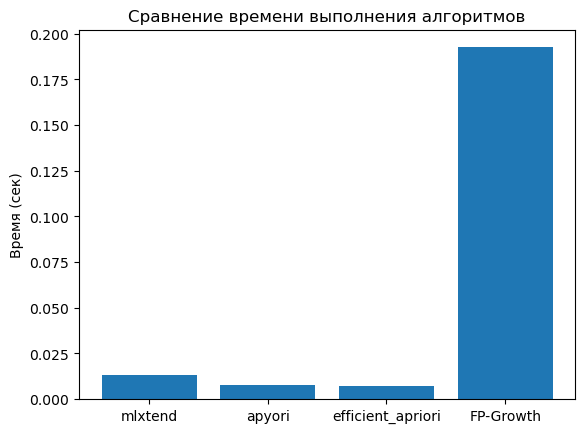

Shillo S.O. IKBO-25-21


In [178]:
# Сравнение времени выполнения
plt.bar(['mlxtend', 'apyori', 'efficient_apriori', 'FP-Growth'],
        [mlxtend_time, apyori_time, efficient_apriori_time, fp_growth_time])
plt.title("Сравнение времени выполнения алгоритмов")
plt.ylabel("Время (сек)")
plt.show()
print("Shillo S.O. IKBO-25-21")
